In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df_=pd.read_csv(r"D:\Project QUANT\AMZN_1min.txt",header=None,parse_dates=[0])

In [47]:
df_.head()

,0,1,2,3,4,5
0,2005-01-03 08:00:00,44.56,45.14,44.56,44.75,2322
1,2005-01-03 08:01:00,45.13,45.30,45.08,45.10,5426
2,2005-01-03 08:02:00,45.30,45.35,45.30,45.35,400
3,2005-01-03 08:03:00,45.35,45.35,45.30,45.35,2000
4,2005-01-03 08:04:00,45.35,45.58,45.30,45.55,3750


In [48]:
df_.columns=["time","open","max","min","close","volume"]

In [49]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001747 entries, 0 to 2001746
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   time    datetime64[ns]
 1   open    float64       
 2   max     float64       
 3   min     float64       
 4   close   float64       
 5   volume  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 91.6 MB


In [50]:
day= df_[ (df_["time"]>"2005-01-13 09:30:00") & (df_["time"]<"2005-01-20 16:00:00")]

In [51]:
day

,time,open,max,min,close,volume
3601,2005-01-13 09:31:00,42.50,42.68,42.40,42.620,38116
3602,2005-01-13 09:32:00,42.64,42.71,42.60,42.700,33085
3603,2005-01-13 09:33:00,42.68,42.68,42.56,42.640,30262
3604,2005-01-13 09:34:00,42.64,42.67,42.58,42.610,56279
3605,2005-01-13 09:35:00,42.61,42.66,42.38,42.457,87830
...,...,...,...,...,...,...
5839,2005-01-20 15:55:00,42.27,42.28,42.25,42.250,55006
5840,2005-01-20 15:56:00,42.27,42.28,42.20,42.220,81931
5841,2005-01-20 15:57:00,42.21,42.28,42.21,42.260,24954
5842,2005-01-20 15:58:00,42.27,42.37,42.23,42.320,56592


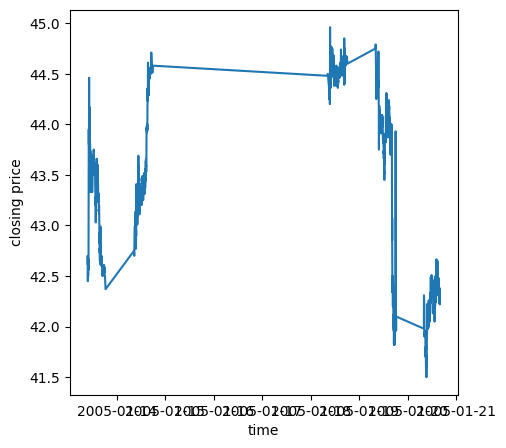

In [52]:
#plt.plot(df.time, df.close)
plt.figure(figsize=(5, 5))  # Specify width and height in inches
plt.xlabel("time")
plt.ylabel("closing price")
plt.plot(day.time, day.close)


In [53]:
df= day[["time", "close"]]
df.head()
df.set_index('time', inplace=True)


In [54]:
df.head()

,close
time,
2005-01-13 09:31:00,42.620
2005-01-13 09:32:00,42.700
2005-01-13 09:33:00,42.640
2005-01-13 09:34:00,42.610
2005-01-13 09:35:00,42.457


In [55]:
df.isnull().sum()
df2=df

In [56]:
from copy import deepcopy as dc

def make_data(df, parts):
    df = dc(df)
    
   # df.set_index('Date', inplace=True)
    
    for i in range(1, parts+1):
        df[f'close(t-{i})'] = df['close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

shift = 5
dfs = make_data(df, shift)
dfs


,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5)
time,,,,,,
2005-01-13 09:36:00,42.55,42.457,42.610,42.640,42.700,42.620
2005-01-13 09:37:00,42.45,42.550,42.457,42.610,42.640,42.700
2005-01-13 09:38:00,42.52,42.450,42.550,42.457,42.610,42.640
2005-01-13 09:39:00,42.46,42.520,42.450,42.550,42.457,42.610
2005-01-13 09:40:00,42.52,42.460,42.520,42.450,42.550,42.457
...,...,...,...,...,...,...
2005-01-20 15:55:00,42.25,42.270,42.330,42.380,42.330,42.250
2005-01-20 15:56:00,42.22,42.250,42.270,42.330,42.380,42.330
2005-01-20 15:57:00,42.26,42.220,42.250,42.270,42.330,42.380


In [57]:
dfs=dfs.to_numpy()

In [58]:
dfs.shape

(2238, 6)

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dfs = sc.fit_transform(dfs)

dfs

array([[-1.0548265 , -1.16166549, -0.9864028 , -0.95238145, -0.88399743,
        -0.97627727],
       [-1.16957803, -1.05494011, -1.16201337, -0.98682275, -0.9528997 ,
        -0.88438685],
       [-1.08925196, -1.16969858, -1.05526969, -1.16247338, -0.98735083,
        -0.95330467],
       ...,
       [-1.38760594, -1.43364308, -1.39960414, -1.37715749, -1.30889475,
        -1.25194855],
       [-1.31875502, -1.38773969, -1.43403758, -1.40011835, -1.37779702,
        -1.30938007],
       [-1.27285441, -1.3188846 , -1.38812632, -1.43455965, -1.40076444,
        -1.37829789]])

In [60]:
X=dfs[:,1:]
Y=dfs[:,0:1]
Y

array([[-1.0548265 ],
       [-1.16957803],
       [-1.08925196],
       ...,
       [-1.38760594],
       [-1.31875502],
       [-1.27285441]])

In [61]:
X = dc(np.flip(X, axis=1))

In [62]:
split = int(len(X) * 0.95)

split

2126

In [63]:
X_train= X[:split]
X_test=X[split:]
Y_train= Y[:split]
Y_test=Y[split:]

In [64]:
X_train = X_train.reshape((-1, shift, 1))  #FOR LSTM MODEL WE NEED 3-D DATA
X_test = X_test.reshape((-1, shift, 1))

Y_train = Y_train.reshape((-1, 1))
Y_test = Y_test.reshape((-1, 1))
X_train.shape

(2126, 5, 1)

In [65]:
import torch
import torch.nn as nn
X_train = torch.tensor(X_train).float()
Y_train = torch.tensor(Y_train).float()
X_test = torch.tensor(X_test).float()
Y_test = torch.tensor(Y_test).float()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(torch.Size([2126, 5, 1]),
 torch.Size([112, 5, 1]),
 torch.Size([2126, 1]),
 torch.Size([112, 1]))

In [66]:
#Loading the data for pytorch
from torch.utils.data import Dataset

class Data(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_data = Data(X_train, Y_train)
test_data = Data(X_test, Y_test)

In [67]:
from torch.utils.data import DataLoader

batch_size = 10

train = DataLoader(train_data, batch_size=batch_size)
test = DataLoader(test_data, batch_size=batch_size)

In [68]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [69]:
learning_rate=0.001
epochs=30
lossf= torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [70]:
def training():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train):
        x_batch, y_batch = batch[0], batch[1]
        
        output = model(x_batch)
        loss = lossf(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [71]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test):
        x_batch, y_batch = batch[0], batch[1]
        
        with torch.no_grad():
            output = model(x_batch)
            loss = lossf(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [72]:

for epoch in range(epochs):
    training()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.512
Batch 200, Loss: 1.410

Val Loss: 2.235
***************************************************

Epoch: 2
Batch 100, Loss: 0.425
Batch 200, Loss: 1.175

Val Loss: 1.195
***************************************************

Epoch: 3
Batch 100, Loss: 0.209
Batch 200, Loss: 0.405

Val Loss: 0.040
***************************************************

Epoch: 4
Batch 100, Loss: 0.081
Batch 200, Loss: 0.143

Val Loss: 0.019
***************************************************

Epoch: 5
Batch 100, Loss: 0.073
Batch 200, Loss: 0.099

Val Loss: 0.032
***************************************************

Epoch: 6
Batch 100, Loss: 0.055
Batch 200, Loss: 0.078

Val Loss: 0.037
***************************************************

Epoch: 7
Batch 100, Loss: 0.042
Batch 200, Loss: 0.063

Val Loss: 0.038
***************************************************

Epoch: 8
Batch 100, Loss: 0.032
Batch 200, Loss: 0.052

Val Loss: 0.036
***************************************************



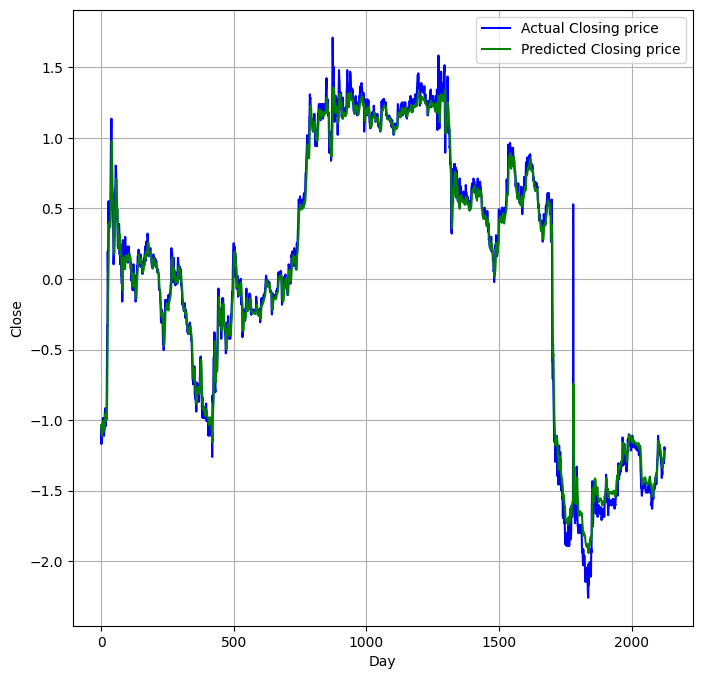

In [81]:
with torch.no_grad():
    predicted = model(X_train).numpy()
plt.figure(figsize=(8, 8))
    
plt.plot(Y_train, label='Actual Closing price',color="blue")
plt.plot(predicted, label='Predicted Closing price',color="g")
plt.xlabel('Day')
plt.ylabel('Close')
plt.grid(True)
plt.legend()
plt.show()